In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score,r2_score


In [114]:
df=pd.read_csv('housing.csv')


In [115]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


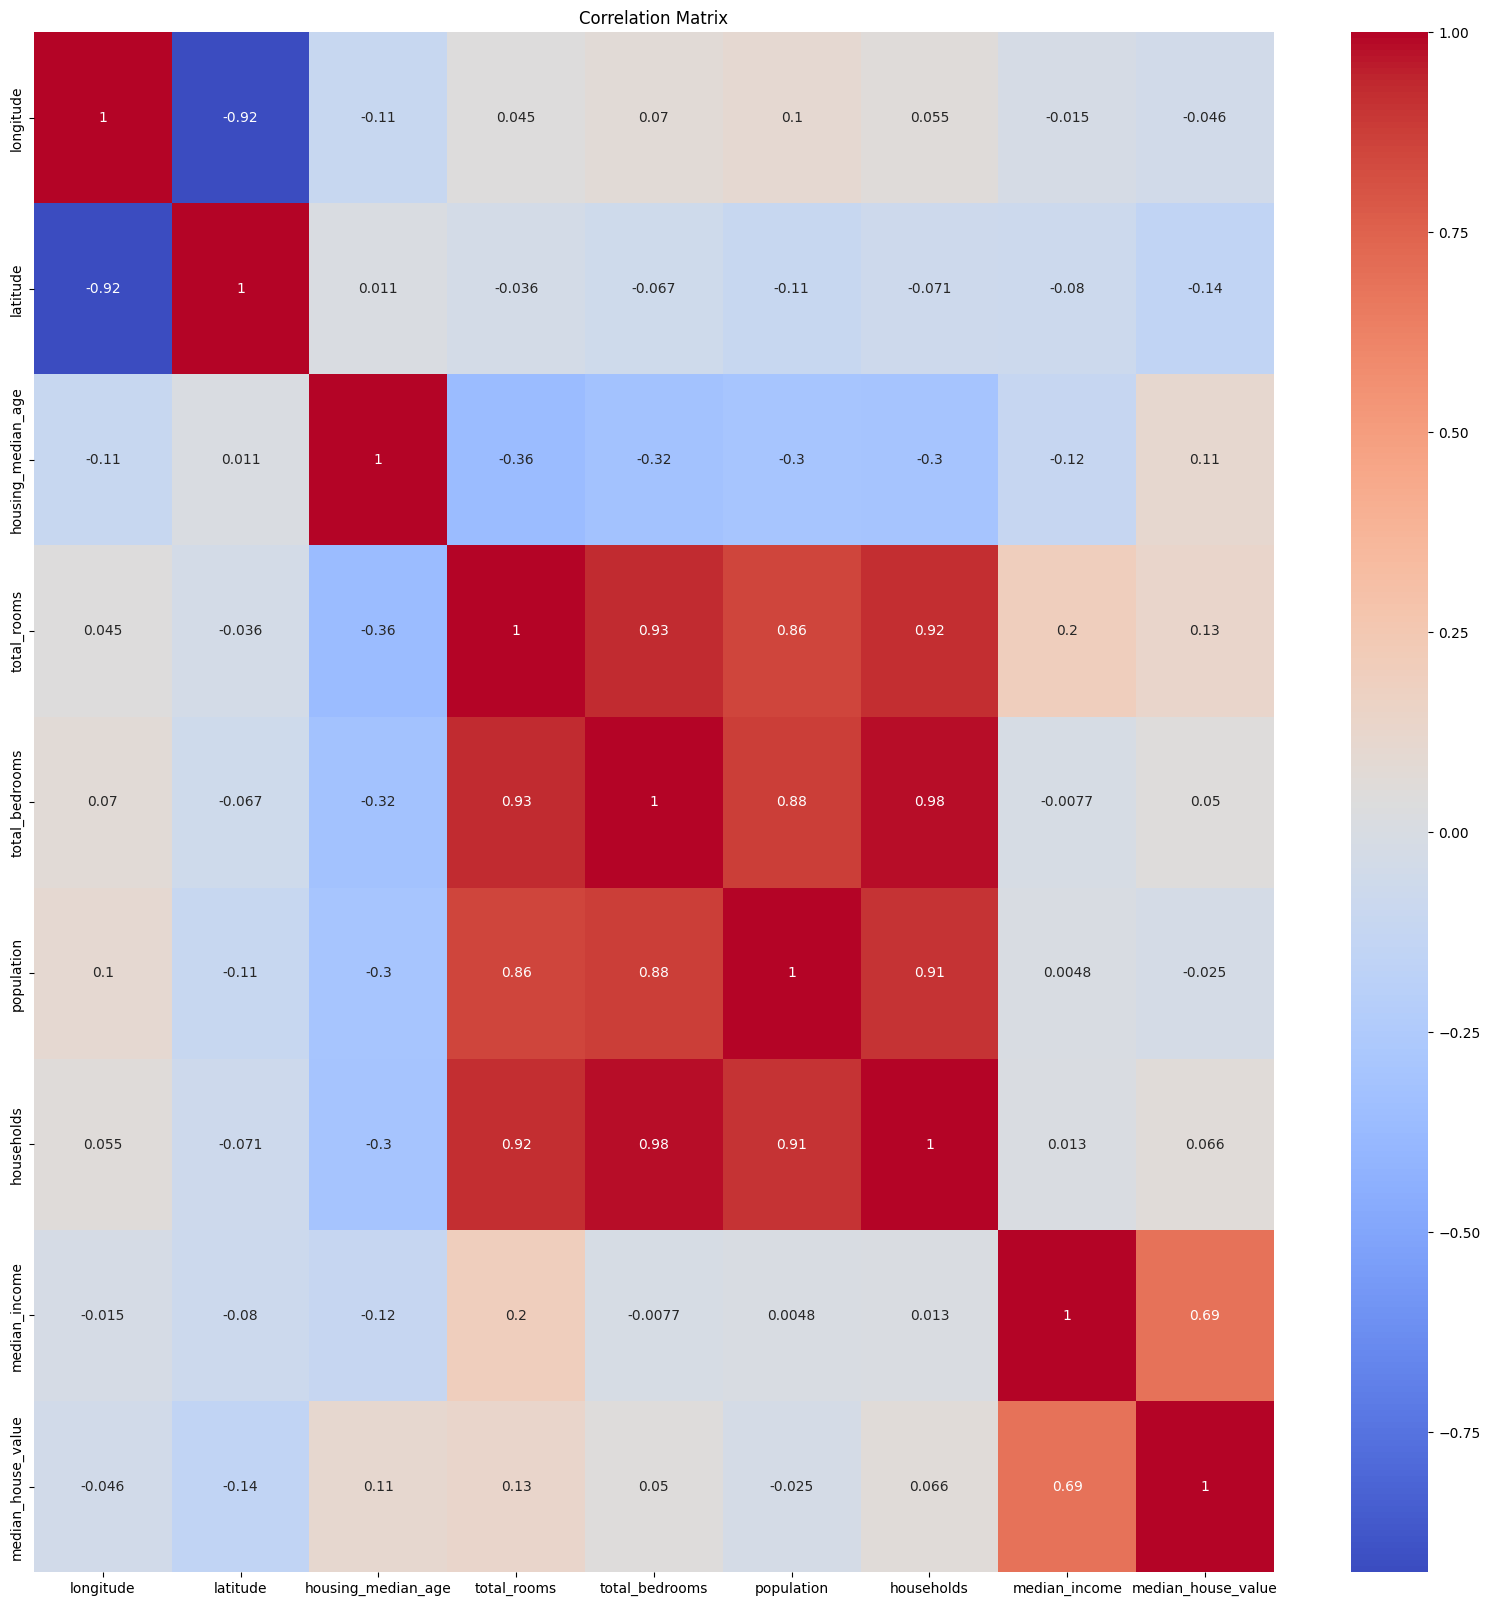

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
numeric_features = df.select_dtypes(include='number')
corr_matrix = numeric_features.corr()

# Set the figure size
plt.figure(figsize=(20, 20))  # Adjust size as needed

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


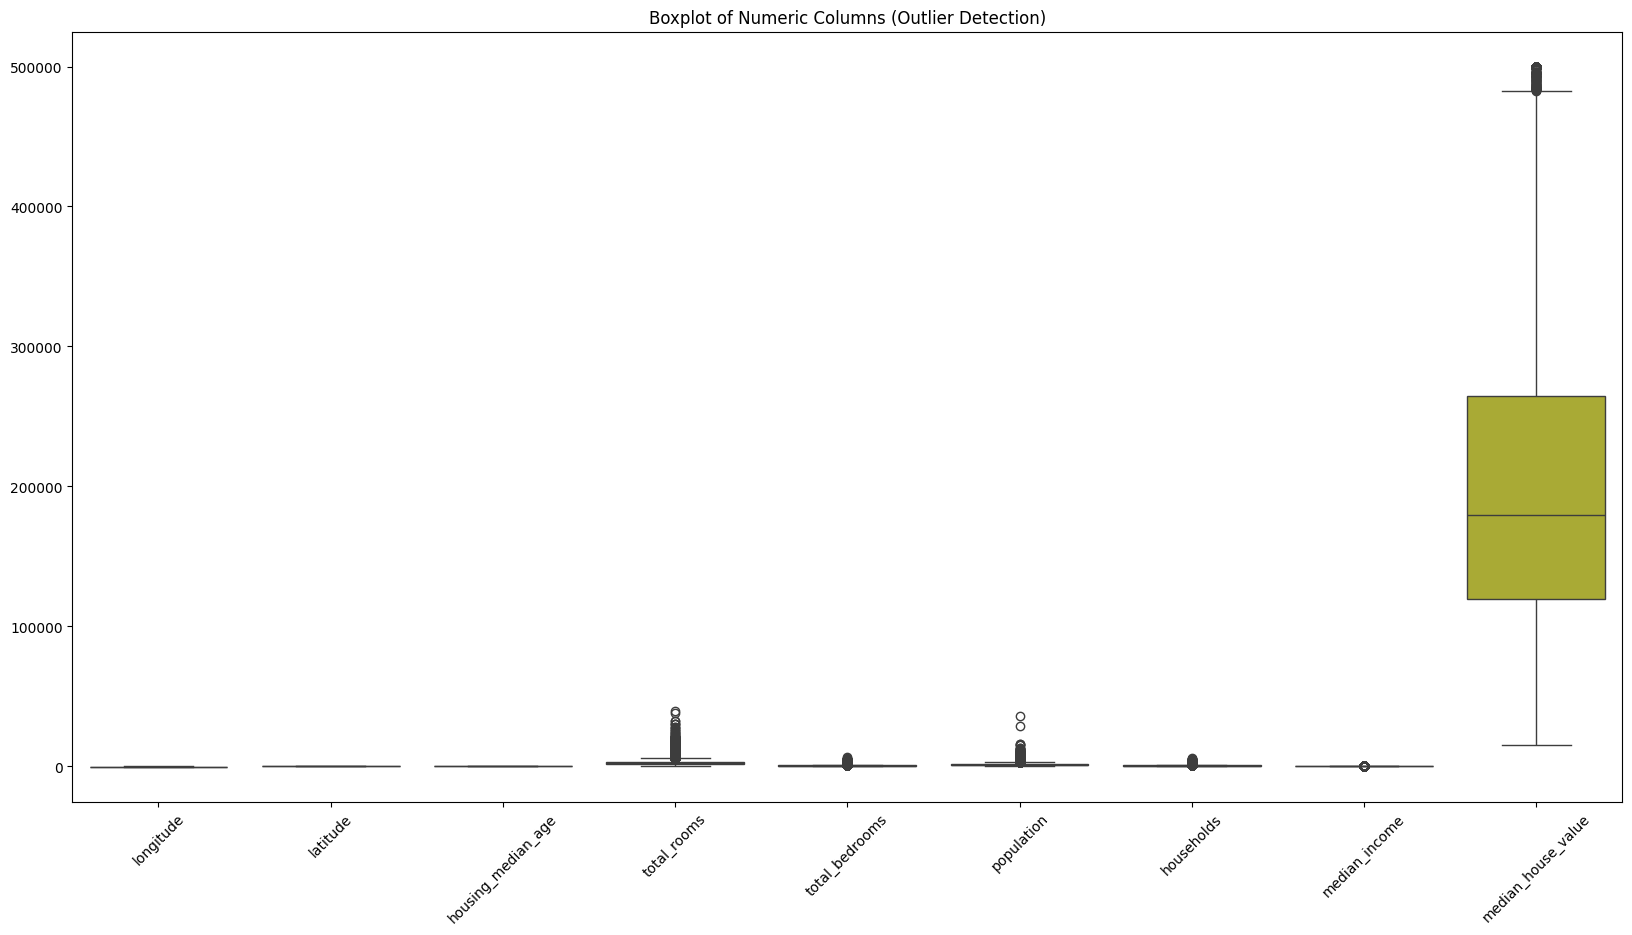

In [117]:

numeric_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(20, 10))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Columns (Outlier Detection)")
plt.show()


In [118]:
column=['median_house_value']
for col in column:
    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers_iqr = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [119]:
df_no_outliers_iqr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19569.000000,19569.000000,19569.000000,19569.000000,19369.000000,19569.000000,19569.000000,19569.000000,19569.000000
mean,-119.562786,35.654159,28.352752,2619.977260,539.893335,1442.788952,501.394859,3.665568,190852.301906
std,2.005764,2.151007,12.497772,2183.419302,422.650225,1145.011369,383.396308,1.557927,95438.555669
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,297.000000,797.000000,282.000000,2.522700,116200.000000
50%,-118.510000,34.270000,28.000000,2110.000000,437.000000,1181.000000,411.000000,3.441200,173200.000000
75%,-117.990000,37.730000,37.000000,3123.000000,648.000000,1749.000000,606.000000,4.572100,246700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,482200.000000


In [120]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [121]:
df_no_outliers_iqr.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,200
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [122]:
num_columns=['total_bedrooms']
for col in num_columns:
    df_no_outliers_iqr[col]=df_no_outliers_iqr[col].replace('?',np.nan)
    meanvalue=df_no_outliers_iqr[col].mean()
    df_no_outliers_iqr[col]=df_no_outliers_iqr[col].fillna(meanvalue)




/tmp/ipython-input-1333048563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_iqr[col]=df_no_outliers_iqr[col].replace('?',np.nan)
/tmp/ipython-input-1333048563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_iqr[col]=df_no_outliers_iqr[col].fillna(meanvalue)


In [123]:
df_no_outliers_iqr.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [124]:
duplicate_count = df_no_outliers_iqr.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [125]:

label_encoder=LabelEncoder()

cat_columns=df_no_outliers_iqr.select_dtypes(include=['object']).columns
for col in cat_columns:
    df_no_outliers_iqr[col]=label_encoder.fit_transform(df_no_outliers_iqr[col])





/tmp/ipython-input-2645970531.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_iqr[col]=label_encoder.fit_transform(df_no_outliers_iqr[col])


In [126]:
df_no_outliers_iqr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [127]:
X = df_no_outliers_iqr.drop("median_house_value", axis=1)
y = df_no_outliers_iqr["median_house_value"]



In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [129]:
model = LinearRegression()

In [130]:
model.fit(X_train,y_train)

LinearRegression()

In [131]:
y_pred = model.predict(X_test)
y_pred

array([ 74295.9046682 , 128778.44775865, 262130.54578263, ...,
       170154.53167897, 228191.06146146, 133323.56505656])

In [132]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R² Score: 0.6123472759013568
MAE: 44577.91756659342
RMSE: 59875.628648650636
